* Resolve metadata issues from image

* Write functions for following

* Inputs percentage and image, and returns the image by adding white/gray/black border. Border size should be according to the percentage of width and height.

* Inputs image, and resize the image with fix width size 1024 pixels and the heights should be adjust according to the aspect ratio of the image

* Inputs an image and multiplying factor, and returns the resized image according to multiplying factor.

* Inputs an image and add noice on it

* Inputs an image and add blur on it

* Inputs an image and change brightness of that image

* Inputs an image, calculate histograms of that image and remove the pixels colors, whose frequency is less (grayscale)

* Read and try to implement following

* Edge detection (Canny edge detection, Sobel edge detection, and Laplacian of Gaussian (LoG) edge detection)

* Feature Extraction Techniques (SIFT, SURF, and ORB etc)

* Hough transform

* Fourier transform

* Histograms

* Morphology

* Optical flow

* Contour detection

You can also practice by writing codes for these

* Gaussian Blur filter with kernel size of 5x5.

* Median Blur filter with kernel size of 5x5.

* Bilateral Filter with diameter of 9, sigmaColor of 75 and sigmaSpace of 75.

* Thresholding with cv2.ADAPTIVE_THRESH_MEAN_C with blockSize of 11 and cv2.THRESH_BINARY.

* Morphological Opening with a kernel size of 3x3.

* Morphological Closing with a kernel size of 3x3.

In [44]:
from PIL import Image
import cv2
from exif import Image
from PIL import Image, ImageOps
import numpy as np
from PIL.ExifTags import TAGS, GPSTAGS
from matplotlib import pyplot as plt

In [18]:
img  = Image.open("img.jpg")

In [19]:
exif_data = img.getexif()

In [22]:
# looping through all the tags present in exifdata
for tagid in exif_data:
     
    # getting the tag name instead of tag id
    tagname = TAGS.get(tagid, tagid)
 
    # passing the tagid to get its respective value
    value = exif_data.get(tagid)
   
    # printing the final result
    print(f"{tagname:25}: {value}")

GPSInfo                  : 504
ResolutionUnit           : 2
ExifOffset               : 138
Make                     : OPPO
Model                    : A37fw
YCbCrPositioning         : 1
XResolution              : 72.0
YResolution              : 72.0


In [23]:
# * Inputs percentage and image, and returns the image by adding white/gray/black border. Border size should be according to the percentage of width and height.
def border_create(per, img):
    """
    Add border to an image with a size based on a percentage of the image's width and height.
    The border color is white for percentages greater than 0, gray for 0, and black for percentages less than 0.
    """
    width, height = img.size
    br_width = int(width * per / 100)
    br_height = int(height * per / 100)

    if per > 0:
        br_color = (255, 255, 255)
    elif per == 0:
        br_color = (128, 128, 128)
    else:
        br_color = (0, 0, 0)

    border = (br_width, br_height, br_width, br_height)
    bordered_image = ImageOps.expand(img, border=border, fill=br_color)

    return bordered_image

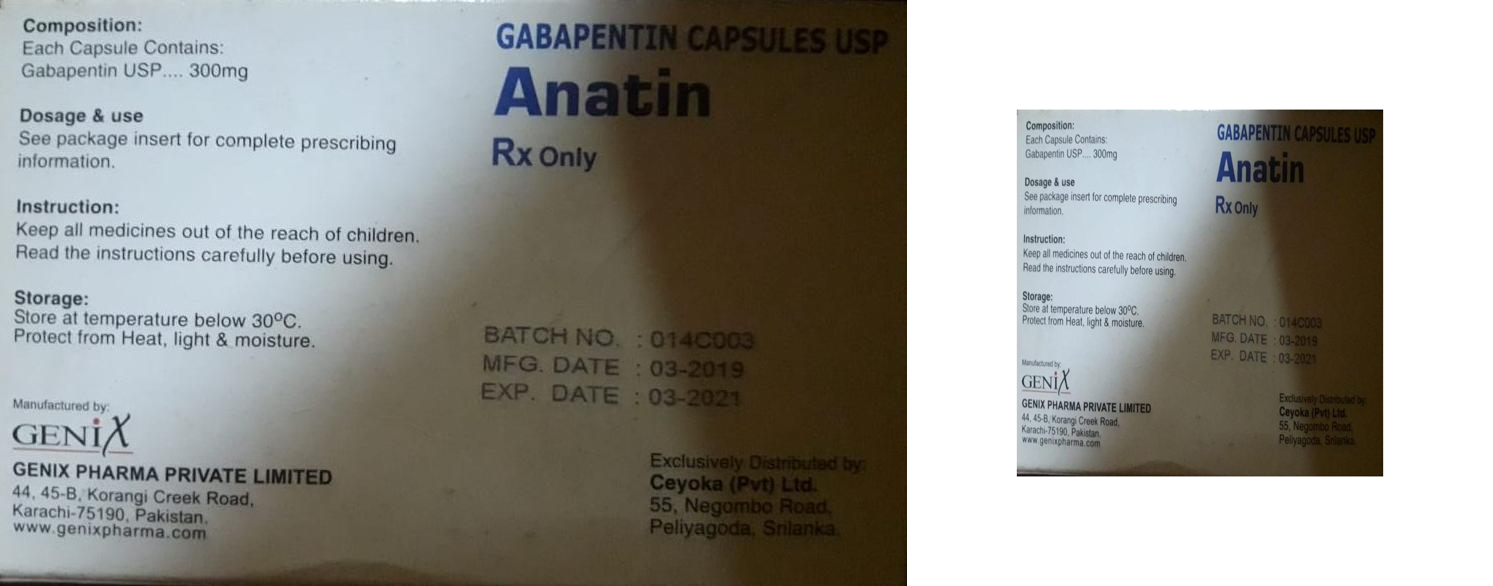

In [24]:

img = Image.open("uneven_img.jpg")
bordered_image = border_create(30, img)
# resize images to put them in array
bordered_image = bordered_image.resize((586, 586))
# print the original and the bordered image 
Image.fromarray(np.hstack((np.array(img), np.array(bordered_image)))) 

In [30]:
# * Inputs image, and resize the image with fix width size 1024 pixels and the heights should be adjust according to the aspect ratio of the image
def resize_image(img, fixed_width):
        width, height = image.size
        aspect_ratio = height / width
        new_height = int(fixed_width * aspect_ratio)
        
        # Resize the image
        resized_image = image.resize((fixed_width, new_height))
        
        # Return the resized image
        return resized_image


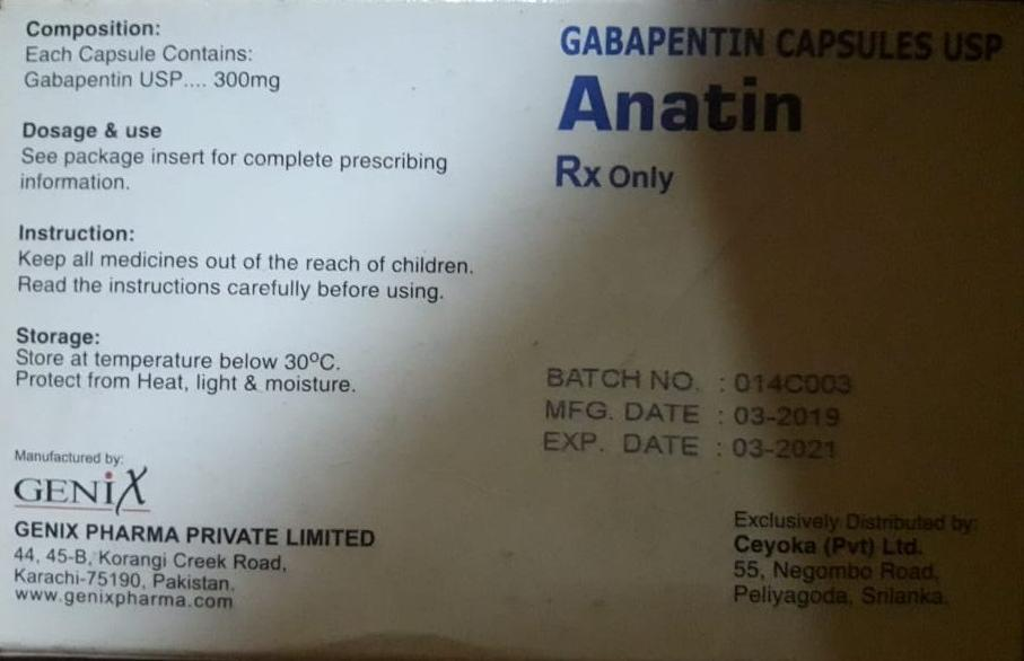

In [33]:
resized_image = resize_image('my_image.jpg', 1024)
resized_image

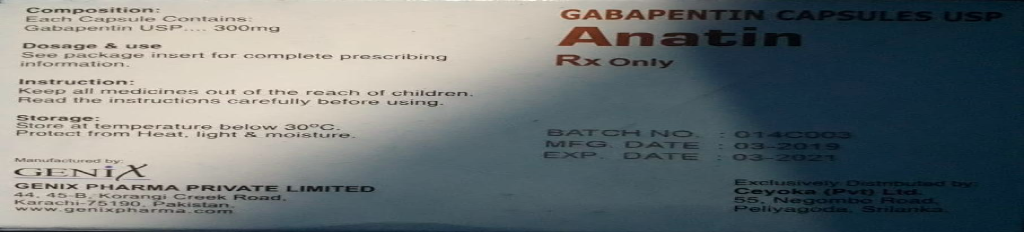

In [34]:
# *Inputs an image and multiplying factor, and returns the resized image according to multiplying factor.
def resize_img(img, mf):
    
    width = 1024
    ar = int((img.shape[1]/img.shape[0])*mf)
    dim = (width, ar)

    resized = cv2.resize(img, dim, interpolation = cv2.INTER_AREA)
    return resized
    
img_path = "uneven_img.jpg"
img = cv2.imread(img_path)
mf=150
display(Image.fromarray(resize_img(img,mf)))

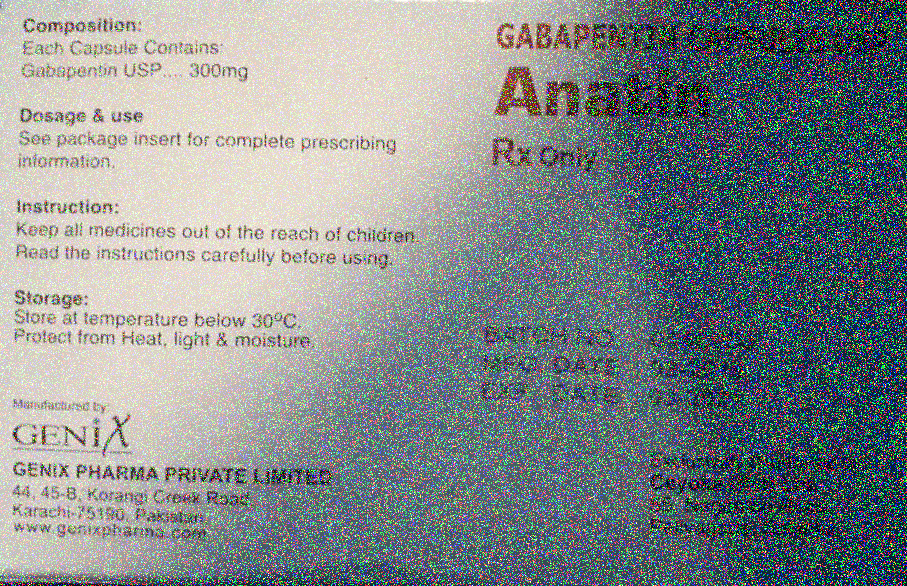

In [35]:
# *Inputs an image and add noice on it
def add_noise(img):
    gauss = np.random.normal(0,1,img.size)
    gauss = gauss.reshape(img.shape[0],img.shape[1],img.shape[2]).astype('uint8')
    img_gauss = cv2.add(img,gauss)
    display(Image.fromarray(img_gauss))
    
add_noise(img)

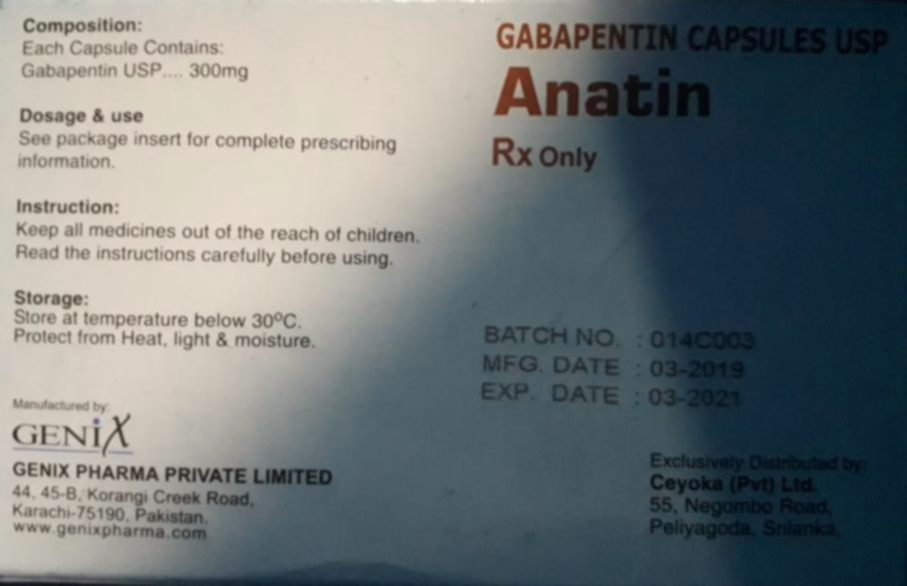

In [39]:
# * Inputs an image and add blur on it
def blur_image(img):
    gausBlur = cv2.GaussianBlur(img, (5,5),0) 
    display(Image.fromarray(gausBlur))
blur_image(img)

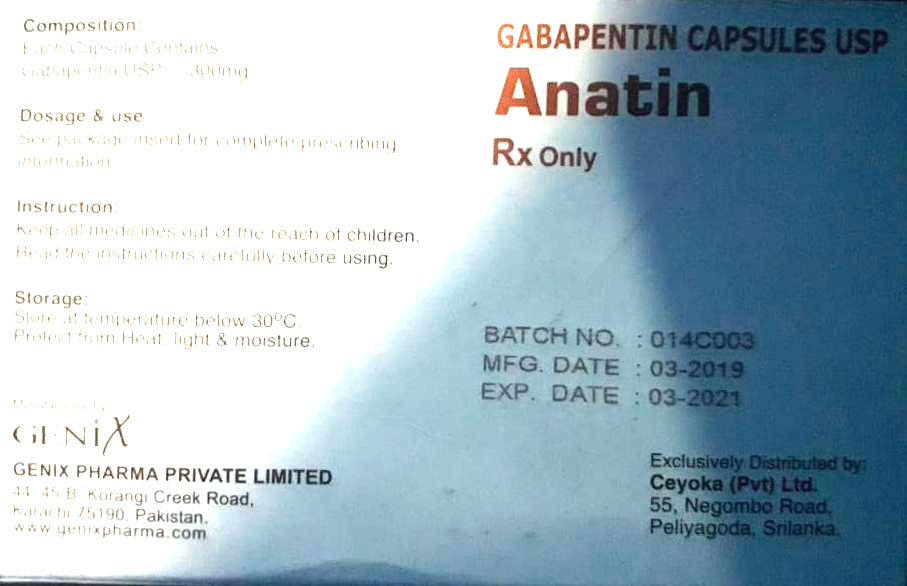

In [42]:
# *Inputs an image and change brightness of that image
def bright_image(img):
    alpha = 2 # Contrast control
    beta = 8 # Brightness control
    bright = cv2.convertScaleAbs(img, alpha=alpha, beta=beta)
    display(Image.fromarray(bright))
bright_image(img)
    

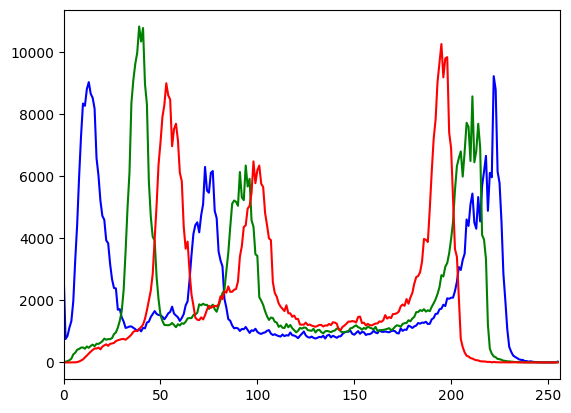

In [45]:
# *Inputs an image, calculate histograms of that image and remove the pixels colors, whose frequency is less (grayscale)
def histogram(img):
    color = ('b','g','r')
    for i,col in enumerate(color):
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.plot(histr,color = col)
        plt.xlim([0,256])
        
histogram(img)

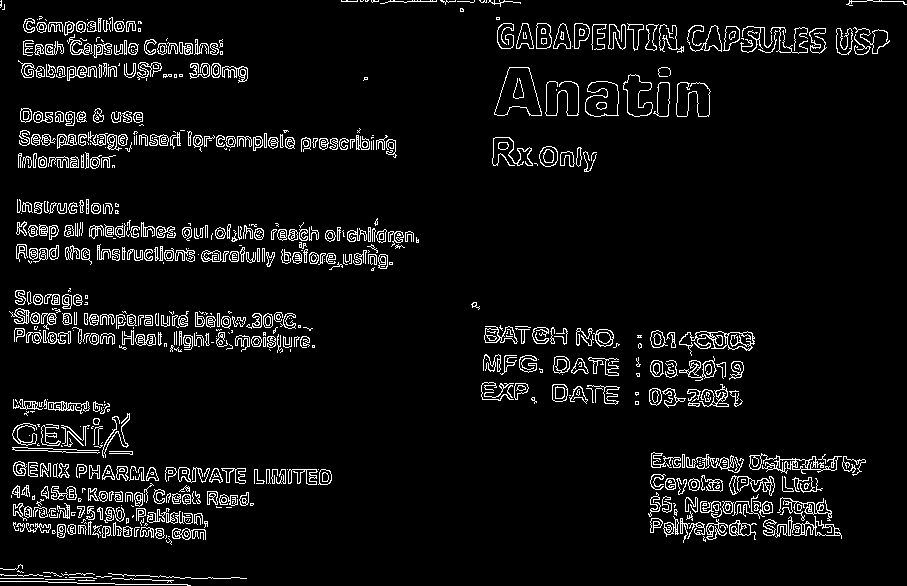

In [48]:
# *Edge detection (Canny edge detection, Sobel edge detection, and Laplacian of Gaussian (LoG) edge detection)
def edge_detection(img):
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    edges = cv2.Canny(gray, threshold1=20, threshold2=80)
    display(Image.fromarray(edges))
edge_detection(img)
        

* Problem Statement

You have been given a set of images containing text that is not clearly visible due to various reasons such as low resolution, uneven illumination, etc. Your task is to enhance the text in these images using OpenCV in Python.

Guidelines:

* Load the input image in grayscale using the cv2.imread() and cv2.cvtColor() functions.

* Apply a thresholding method to segment the foreground text from the background. You can use any thresholding technique such as cv2.THRESH_BINARY, cv2.ADAPTIVE_THRESH_MEAN_C, etc.

* Preprocess the image using morphological operations such as erosion, dilation, opening, and closing. These operations can be performed using functions such as cv2.erode(), cv2.dilate(), cv2.morphologyEx(), etc. These operations will help in removing noise and filling gaps in the text.

* Apply a filter such as cv2.medianBlur() or cv2.bilateralFilter() to smooth the image and further reduce noise.

* Use the cv2.putText() function to add text to the image. You can adjust the font size and color to make the text more visible.

* Save the output image using the cv2.imwrite() function.

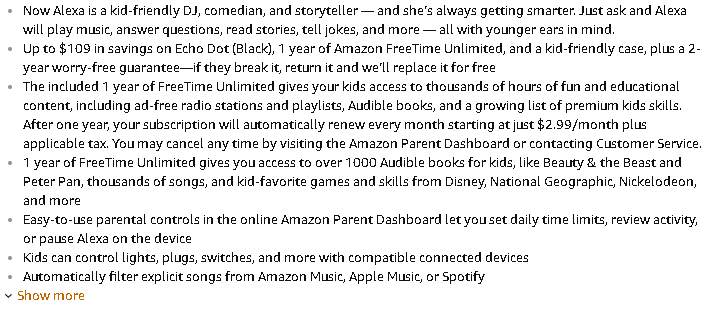

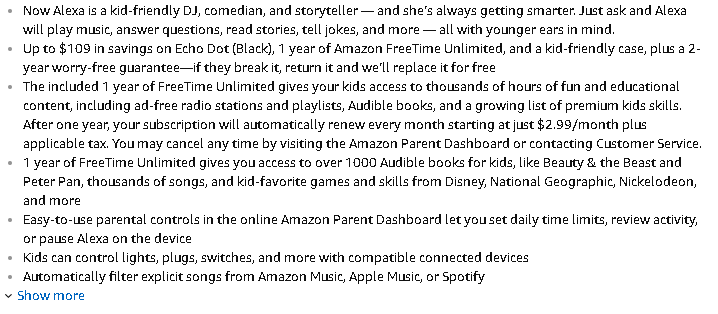

In [50]:
# load  image and display
im_path = "low_res_img.png"
img = cv2.imread(im_path)
pil_img = Image.fromarray(img)
display(pil_img)

cvtColor_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
display(Image.fromarray(cvtColor_img))

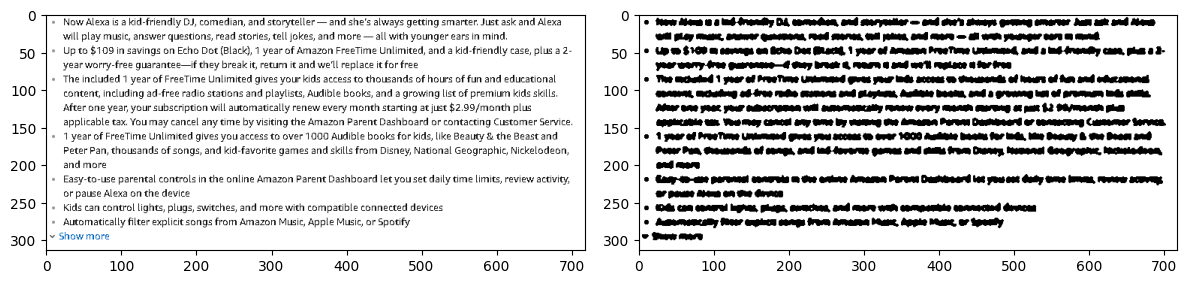

In [55]:
image_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
image_blurred = cv2.GaussianBlur(image_gray, (7, 7), 0)

# Apply adaptive thresholding
image_mask = cv2.adaptiveThreshold(image_blurred, 
                              256, 
                              cv2.ADAPTIVE_THRESH_MEAN_C, 
                              cv2.THRESH_BINARY, 
                              21, 
                              10)

# Plot results
fig, ax = plt.subplots(1, 2, figsize=(12, 5))
ax[0].imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
ax[1].imshow(cv2.cvtColor(image_mask, cv2.COLOR_BGR2RGB))
plt.tight_layout()

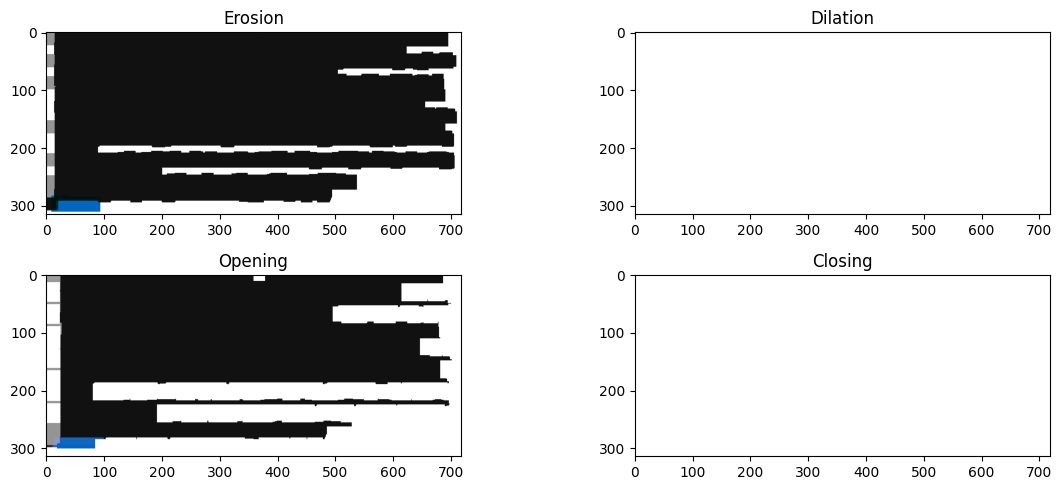

In [61]:
# *Preprocess the image using morphological operations such as erosion, dilation, opening, and closing. These operations can be performed using functions such as cv2.erode(), cv2.dilate(), cv2.morphologyEx(), etc. These operations will help in removing noise and filling gaps in the text
kernel = np.ones((20, 20), np.uint8)


erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)

fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
ax[0][0].title.set_text('Erosion')

ax[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
ax[0][1].title.set_text('Dilation')

ax[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax[1][0].title.set_text('Opening')

ax[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
ax[1][1].title.set_text('Closing')
plt.tight_layout()


In [66]:
# *Preprocess the image using morphological operations such as erosion, dilation, opening, and closing. These operations can be performed using functions such as cv2.erode(), cv2.dilate(), cv2.morphologyEx(), etc. These operations will help in removing noise and filling gaps in the text
kernel = np.ones((20, 20), np.uint8)


erosion = cv2.erode(img, kernel, iterations=1)
dilation = cv2.dilate(img, kernel, iterations=1)

opening = cv2.morphologyEx(img, cv2.MORPH_OPEN, kernel)
closing = cv2.morphologyEx(img, cv2.MORPH_CLOSE, kernel)
fig, ax = plt.subplots(2, 2, figsize=(12, 5))
ax[0][0].imshow(cv2.cvtColor(erosion, cv2.COLOR_BGR2RGB))
ax[0][0].title.set_text('Erosion')

ax[0][1].imshow(cv2.cvtColor(dilation, cv2.COLOR_BGR2RGB))
ax[0][1].title.set_text('Dilation')

ax[1][0].imshow(cv2.cvtColor(opening, cv2.COLOR_BGR2RGB))
ax[1][0].title.set_text('Opening')

ax[1][1].imshow(cv2.cvtColor(closing, cv2.COLOR_BGR2RGB))
ax[1][1].title.set_text('Closing')
plt.tight_layout()




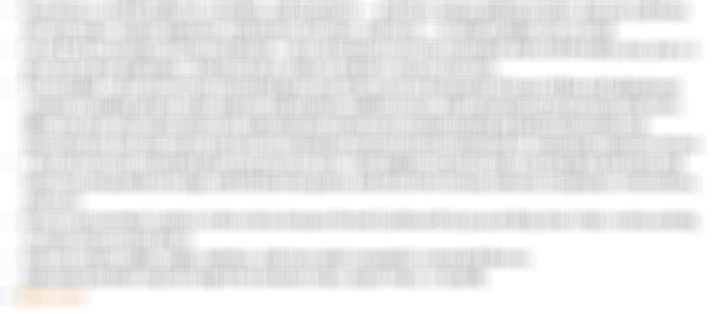

In [62]:
ksize = (20, 20)
blur_img = cv2.blur(img, ksize) 
display(Image.fromarray(blur_img))

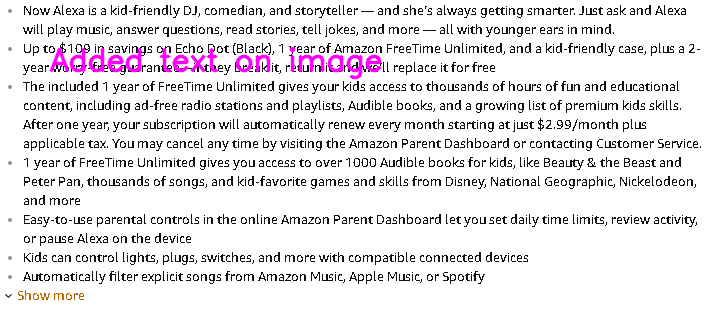

In [58]:
im_path = "low_res_img.png"
img = cv2.imread(im_path)
font = cv2.FONT_HERSHEY_SIMPLEX
org = (50, 70)
fontScale = 1
# Blue color in BGR
color = (255, 0, 255)
# Line thickness of 2 px
thickness = 2
   
# Using cv2.putText() method
text_img = cv2.putText(img, 'Added text on image', org, font, fontScale, color, thickness, cv2.LINE_AA)
display(Image.fromarray(text_img))

In [59]:
cv2.imwrite('new_image.png',text_img)

True